# PyCUDA 图像处理 灰度图像二值化

In [1]:
import pycuda.autoinit
import pycuda.driver as drv
import numpy as np
from pycuda.compiler import SourceModule
import string
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import  animation

In [2]:
def load_kernel_from_file(fname,kname):
    sources = None
    kernel = None
    with open(fname,encoding='utf-8') as f:
        sources = f.read() # 通过str函数转换为unicode编码
        sm = SourceModule(str(sources))
        kernel = sm.get_function(kname)
    return kernel

def load_kernel_from_string(sources,kname):
    sm = SourceModule(str(sources))
    kernel = sm.get_function(kname)
    return kernel

In [28]:
threshold = load_kernel_from_file('../../datas/cuda/09-threshold.cu','threshold')
multi_threshold = load_kernel_from_file('../../datas/cuda/09-threshold.cu','multi_threshold')

In [8]:
src = cv2.imread('../../datas/f1.jpg',0)

In [15]:
dst = np.zeros_like(src)

In [16]:
rows,cols = src.shape
block = (32,32,1)
grid = (int(cols / block[0]),int(rows / block[1]), 1)

In [23]:
threshold(drv.In(src),
         drv.Out(dst),
         np.int32(cols),np.int32(rows),np.int32(160),
         grid=grid,block=block)

Text(0.5,1,'Threshold')

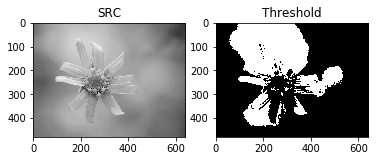

In [24]:
plt.subplot(121)
plt.imshow(src,'gray')
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst,'gray')
plt.title('Threshold')

In [25]:
dst = np.zeros_like(src)

In [31]:
multi_threshold(drv.In(src),
         drv.Out(dst),
         np.int32(cols),np.int32(rows),np.int32(160),np.int32(180),
         grid=grid,block=block)

Text(0.5,1,'Multi-Threshold')

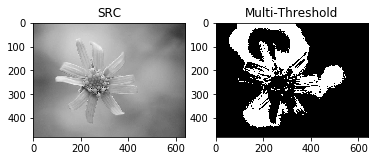

In [32]:
plt.subplot(121)
plt.imshow(src,'gray')
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst,'gray')
plt.title('Multi-Threshold')